In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
from keras.datasets import fashion_mnist
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras import backend as K
from sklearn import metrics

In [116]:
LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [117]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = np.size(np.unique(y_train))
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [118]:
print(x_train.shape)
print(y_train.shape)
print(num_classes)

(60000, 28, 28, 1)
(60000, 10)
10


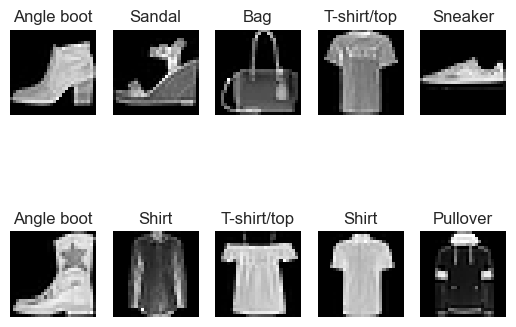

In [119]:
indices = np.random.choice(np.arange(x_train.shape[0]), 10, replace=False)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']
plt.figure()
for idx, i in enumerate(indices):
    plt.subplot(2, 5, idx+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(classes[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [120]:
model = models.Sequential()
model.add(Input(input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.30))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,794 (237.48 KB)

 Trainable params: 60,794 (237.48 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
epochs = 20
batch_size = 128
opt = optimizers.Nadam(0.001)
loss = losses.categorical_crossentropy

model.compile(loss=loss,
              optimizer=opt,
              metrics=['acc', keras.metrics.F1Score(name="f1", average="macro")])

In [122]:
history = model.fit(x_train, y_train,
          epochs=epochs,
          steps_per_epoch=100,
          validation_data = (x_test, y_test),
          verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - acc: 0.5197 - f1: 0.5202 - loss: 1.4640 - val_acc: 0.7506 - val_f1: 0.7315 - val_loss: 0.8185
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - acc: 0.7224 - f1: 0.7162 - loss: 0.8813 - val_acc: 0.7819 - val_f1: 0.7631 - val_loss: 0.6738
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - acc: 0.7603 - f1: 0.7517 - loss: 0.7535 - val_acc: 0.7992 - val_f1: 0.7884 - val_loss: 0.6146
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - acc: 0.7790 - f1: 0.7710 - loss: 0.6893 - val_acc: 0.8250 - val_f1: 0.8158 - val_loss: 0.5600
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - acc: 0.7954 - f1: 0.7882 - loss: 0.6438 - val_acc: 0.8370 - val_f1: 0.8334 - val_loss: 0.5307
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - acc: 0.8091 - f1: 0.8038 - loss: 0.6083 - val_acc: 0.8500 - val_f1: 0.8479 - val_loss: 0.5051
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - acc: 0.8184 - f1: 0.8140 - loss: 0.5765 - val_acc:

In [123]:
score = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
y_pred = model.predict(x_test)

print(score)
print('Validation loss:', score['loss'])
print('Validation accuracy:', score['acc'])
print('Validation f1-score: ', np.mean(score['f1']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
{'acc': 0.8955000042915344, 'f1': 0.8938201665878296, 'loss': 0.3393656313419342}
Validation loss: 0.3393656313419342
Validation accuracy: 0.8955000042915344
Validation f1-score:  0.8938201665878296


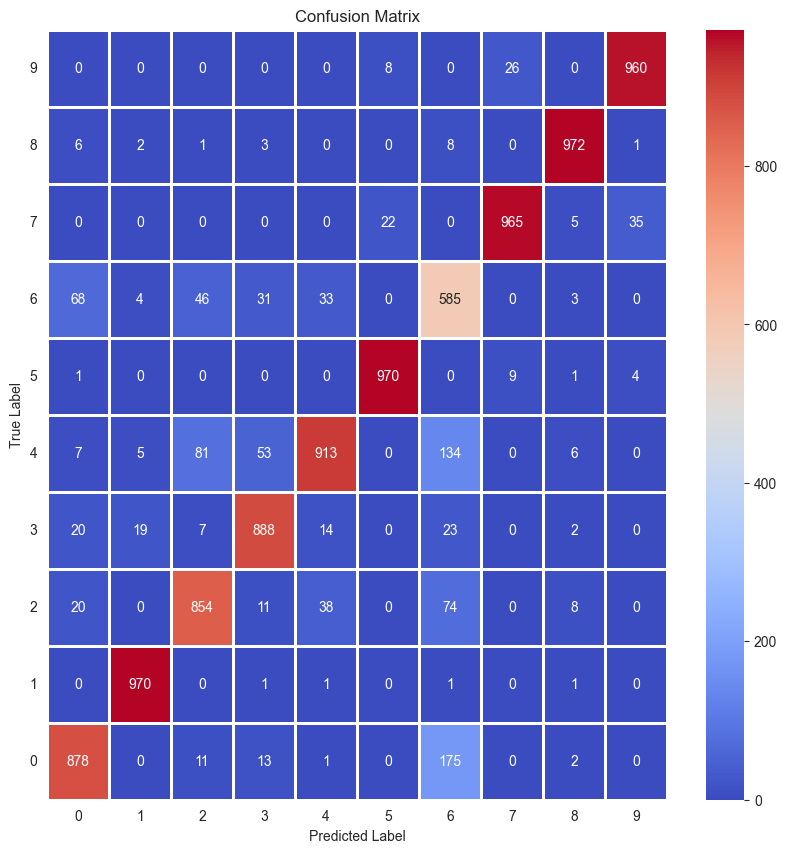

In [124]:
max_pred_y = np.argmax(y_pred, axis=1)
max_test_y = np.argmax(y_test, axis=1)
show_confusion_matrix(max_pred_y, max_test_y, num_classes)

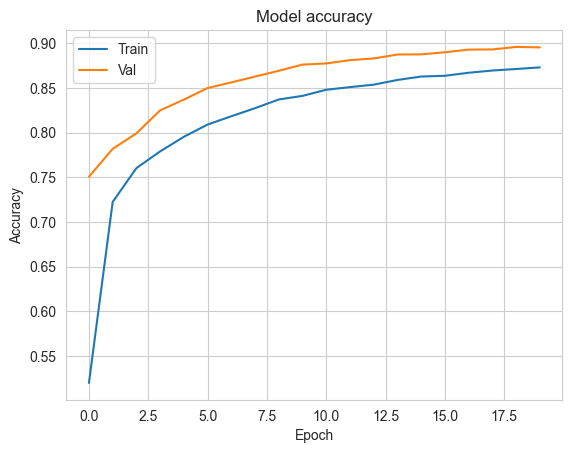

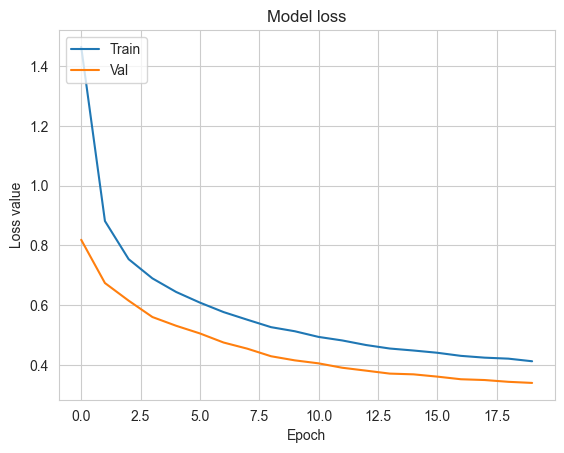

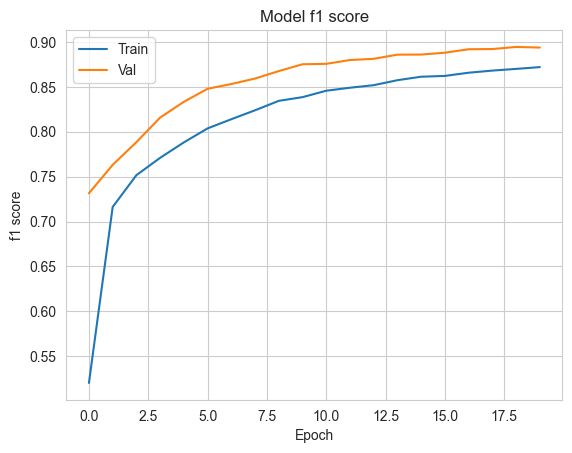

In [125]:
acc = history.history['acc']
loss = history.history['loss']
f1 = history.history['f1']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
val_f1 = history.history['val_f1']

plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(f1)
plt.plot(val_f1)
plt.title('Model f1 score')
plt.xlabel('Epoch')
plt.ylabel('f1 score')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()